In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/adityakumar/BankCD-Prediction/artifacts/data_ingestion/train.csv')

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_364/1089950338.py:1: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/adityakumar/BankCD-Prediction/artifacts/data_ingestion/train.csv')


In [3]:
df.dtypes

id               int64
age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign       float64
pdays            int64
previous       float64
poutcome        object
cd               int64
generation      object
state           object
zipcode          int64
Unnamed: 21     object
Unnamed: 22     object
dtype: object

In [4]:
df.shape

(36871, 23)

In [5]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cd', 'generation', 'state', 'zipcode',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

Categorical Column 

State

In [6]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,cd,generation,state,zipcode,Unnamed: 21,Unnamed: 22
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,...,32.0,144,8.0,failure,1,Millennials,MT,59776,NaN,NaN
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,...,4.0,15,4.0,unknown,1,Millennials,OH,45438,NaN,NaN
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,...,3.0,465,4.0,failure,0,Silent Generation,PR,776,NaN,NaN
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,...,17.0,396,6.0,unknown,1,Older Boomers,WI,54537,NaN,NaN
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,...,28.0,314,24.0,failure,0,Millennials,MP,96952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36866,11284,53,technician,married,secondary,no,26564,yes,yes,unknown,...,15.0,89,24.0,other,0,Younger Boomers,NV,89146,NaN,NaN
36867,44732,64,admin.,divorced,secondary,no,85454,no,no,unknown,...,23.0,210,58.0,other,0,Older Boomers,TX,75616,NaN,NaN
36868,38158,83,entrepreneur,divorced,tertiary,no,52800,yes,no,cellular,...,8.0,361,17.0,other,0,Silent Generation,IN,47690,NaN,NaN
36869,860,86,unemployed,married,secondary,yes,1898,no,no,cellular,...,51.0,164,5.0,success,1,Silent Generation,TX,78971,NaN,NaN


Text(0.5, 1.0, 'state')

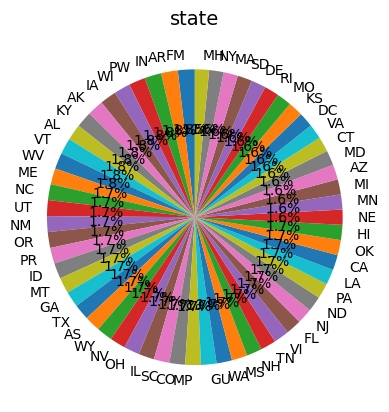

In [7]:
category_counts = df['state'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('state', fontsize=14)

Since state column is 1.7% for each state it wouldnt be helful for dataset and same with zipcode most of values are unique.

job

In [8]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan, 'MANAGEMENT', 'STUDENT',
       'ENTREPRENEUR', 'HOUSEMAID', 'RETIRED', 'UNEMPLOYED', 'TECHNICIAN',
       'ADMIN.', 'BLUE-COLLAR', 'SELF-EMPLOYED'], dtype=object)

In [9]:
#variable are same but in differnet name
df['job'] = df['job'].str.lower()

In [10]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan], dtype=object)

In [11]:
percent_nan = df['job'].isnull().mean() * 100
print(percent_nan)


0.14103224756583765


Text(0.5, 1.0, 'job')

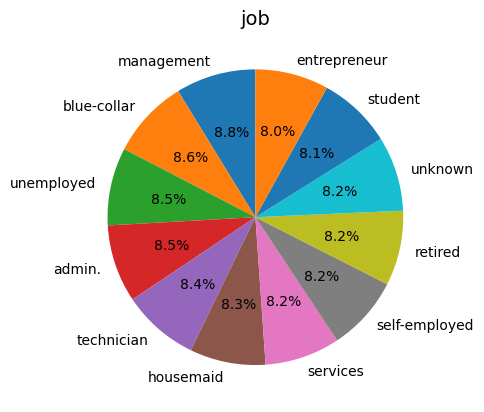

In [12]:
category_counts = df['job'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=14)

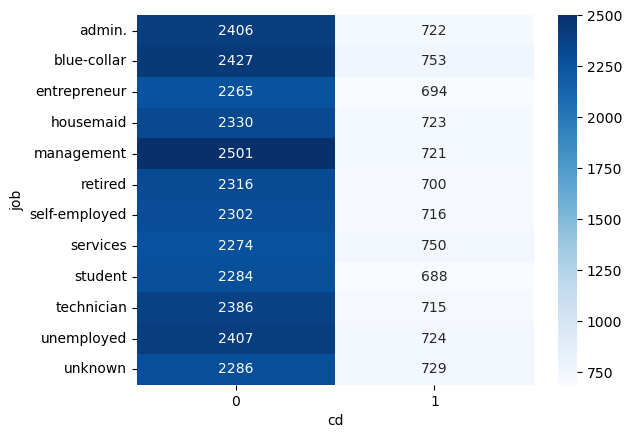

In [13]:
crosstab = pd.crosstab(df['job'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('job')
plt.xlabel('cd')
plt.show()

Marital Column

In [14]:
df['marital'].unique()

array(['single', 'divorced', 'married', nan], dtype=object)

In [15]:
percent_nan = df['marital'].isnull().mean() * 100
print(percent_nan)

1.1553795665970545


Text(0.5, 1.0, 'marital')

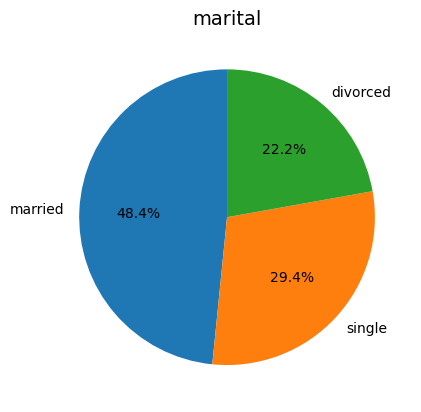

In [16]:
category_counts = df['marital'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('marital', fontsize=14)

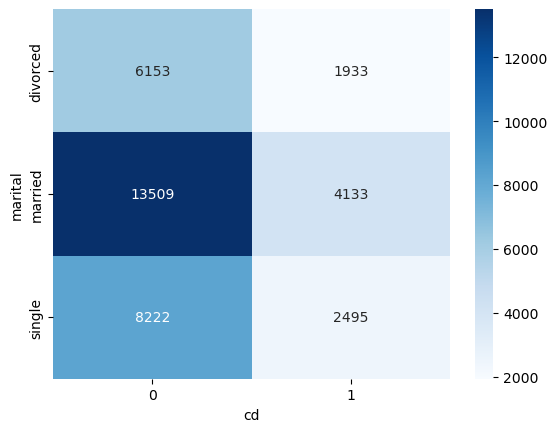

In [17]:
crosstab = pd.crosstab(df['marital'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('marital')
plt.xlabel('cd')
plt.show()

Poutcome

In [18]:
df['poutcome'].unique()

array(['failure', 'unknown', 'other', 'success'], dtype=object)

Text(0.5, 1.0, 'poutcome')

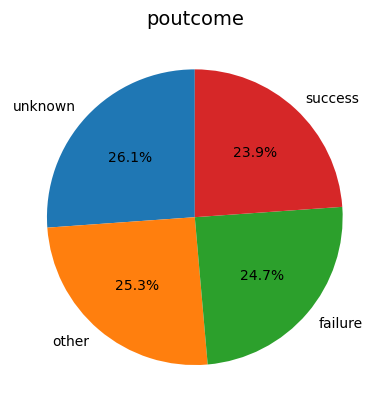

In [19]:
category_counts = df['poutcome'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('poutcome', fontsize=14)

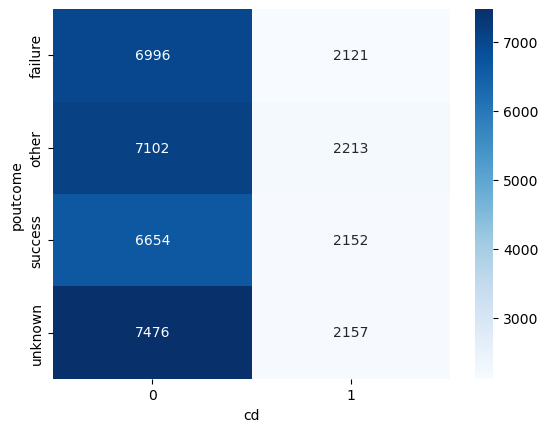

In [20]:
crosstab = pd.crosstab(df['poutcome'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('cd')
plt.ylabel('poutcome')
plt.show()

Contact

In [21]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Text(0.5, 1.0, 'contact')

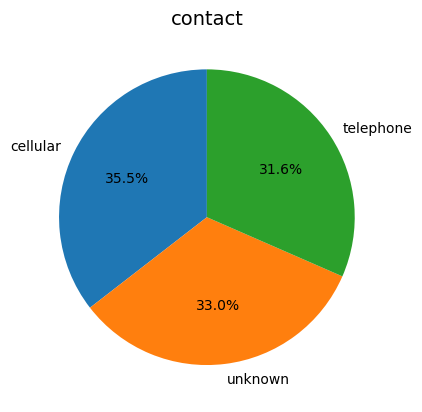

In [22]:
category_counts = df['contact'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('contact', fontsize=14)

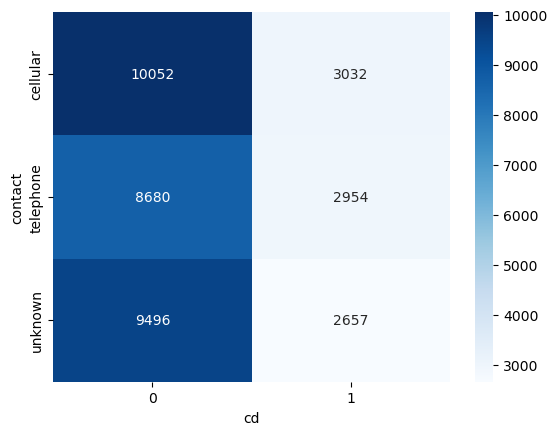

In [23]:
crosstab = pd.crosstab(df['contact'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('contact')
plt.xlabel('cd')
plt.show()

Generation

In [24]:
df['generation'].unique()

array(['Millennials', 'Silent Generation', 'Older Boomers', 'Gen X',
       'Younger Boomers', nan, 'millennials', 'gen x',
       'silent generation', 'older boomers', 'Millenials', 'oler boomers'],
      dtype=object)

In [25]:
df['generation'] = df['generation'].str.lower()

In [26]:
df['generation'] = df['generation'].replace({
    'oler boomers': 'older boomers',
    'millennials': 'millenials'
})

In [27]:
df['generation'].unique()

array(['millenials', 'silent generation', 'older boomers', 'gen x',
       'younger boomers', nan], dtype=object)

In [28]:
percent_nan = df['generation'].isnull().mean() * 100
print(percent_nan)

0.743131458327683


Text(0.5, 1.0, 'generation')

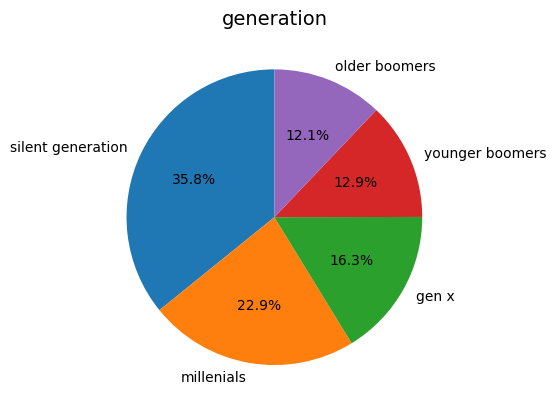

In [29]:
category_counts = df['generation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('generation', fontsize=14)

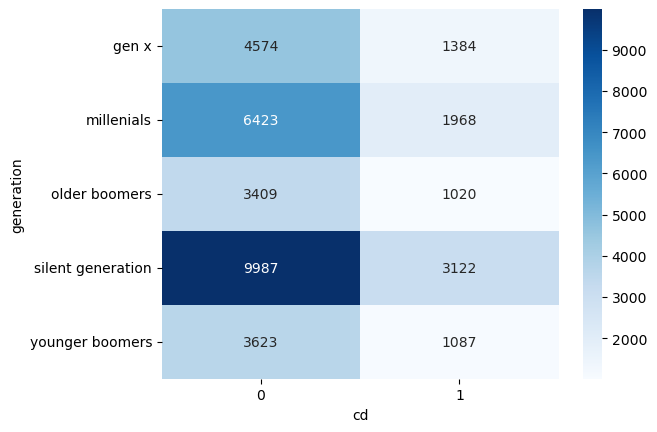

In [30]:
crosstab = pd.crosstab(df['generation'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('generation')
plt.xlabel('cd')
plt.show()

Education

In [31]:
df['education'].unique()

array(['tertiary', 'primary', 'unknown', 'secondary', 'primery',
       'secendary'], dtype=object)

In [32]:
df['education'] = df['education'].replace({
    'tertiary': 'Tertiary',
    'primary': 'Primary',
    'primery': 'Primary',    
    'secondary': 'Secondary',
    'secendary': 'Secondary', 
    'unknown': 'Unknown'
})

Text(0.5, 1.0, 'education')

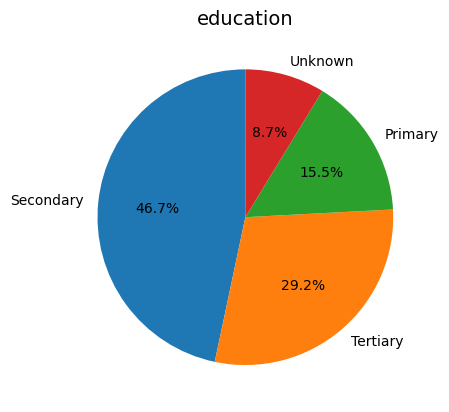

In [33]:
category_counts = df['education'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('education', fontsize=14)

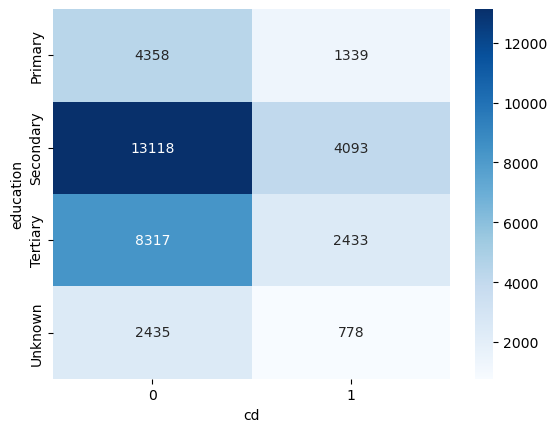

In [34]:
crosstab = pd.crosstab(df['education'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('education')
plt.xlabel('cd')
plt.show()

Month

In [35]:
df['month'].unique()

array(['jan', 'jun', 'may', 'oct', 'feb', 'dec', 'apr', 'nov', 'aug',
       'jul', 'mar', 'sep'], dtype=object)

Text(0.5, 1.0, 'month')

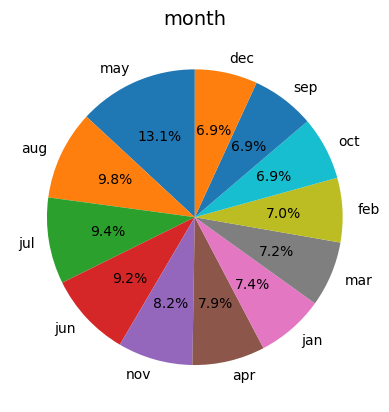

In [36]:
category_counts = df['month'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('month', fontsize=14)

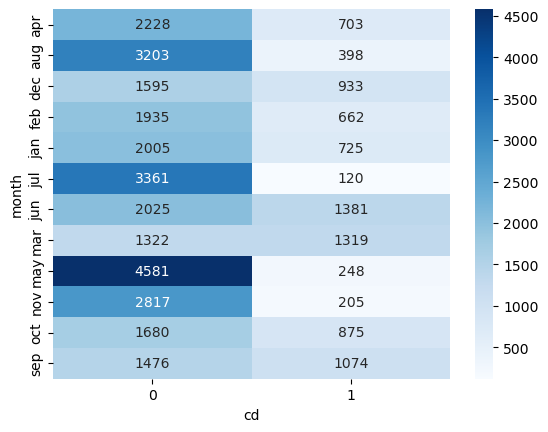

In [37]:
crosstab = pd.crosstab(df['month'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('month')
plt.xlabel('cd')
plt.show()

Converting T/F to 1/0

In [38]:
binary_cols = ['default', 'housing', 'loan']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_364/1092223272.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


Default

In [39]:
df['default'].unique()

array([0, 1])

Text(0.5, 1.0, 'default')

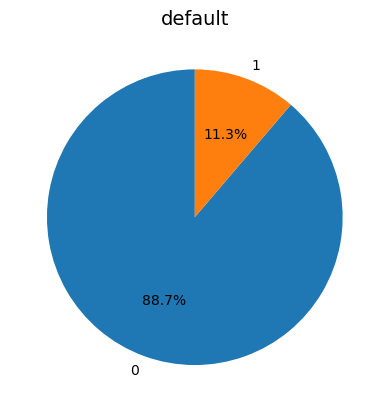

In [40]:
category_counts = df['default'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('default', fontsize=14)

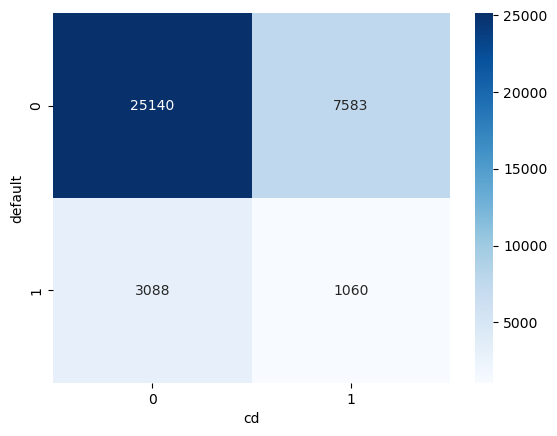

In [41]:
crosstab = pd.crosstab(df['default'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('default')
plt.xlabel('cd')
plt.show()

Housing

In [42]:
df['housing'].unique()

array([0, 1])

Text(0.5, 1.0, 'housing')

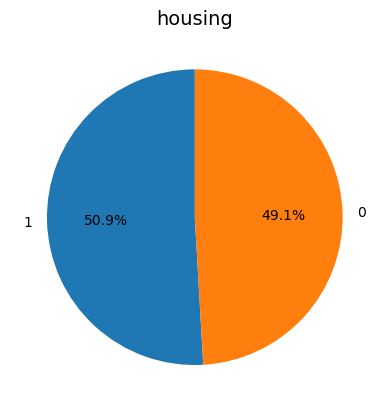

In [43]:
category_counts = df['housing'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('housing', fontsize=14)

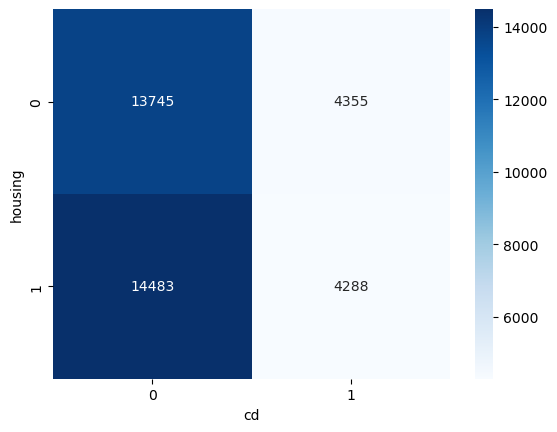

In [44]:
crosstab = pd.crosstab(df['housing'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('housing')
plt.xlabel('cd')
plt.show()

loan

In [45]:
df['loan'].unique()

array([0, 1])

Text(0.5, 1.0, 'loan')

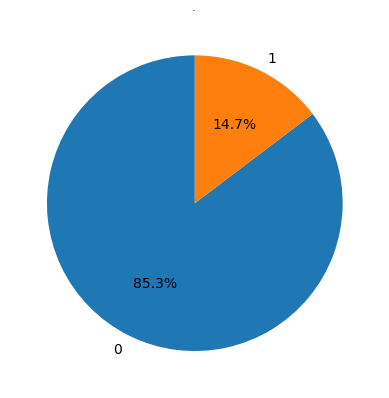

In [46]:
category_counts = df['loan'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('loan', fontsize=1)

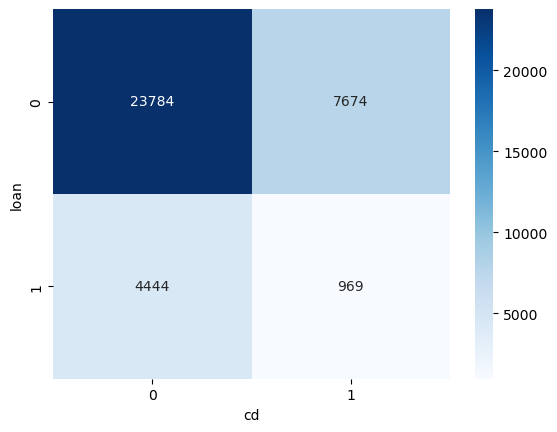

In [47]:
crosstab = pd.crosstab(df['loan'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('loan')
plt.xlabel('cd')
plt.show()

Numerical Col

<Figure size 640x480 with 0 Axes>

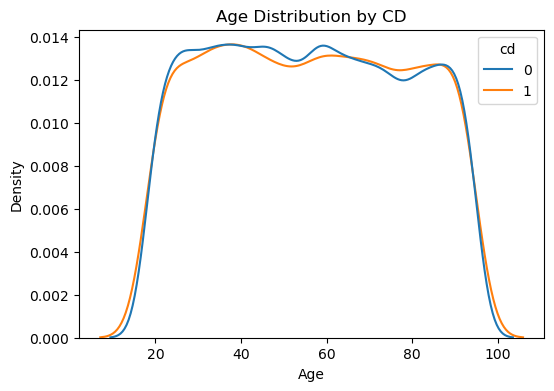

<Figure size 640x480 with 0 Axes>

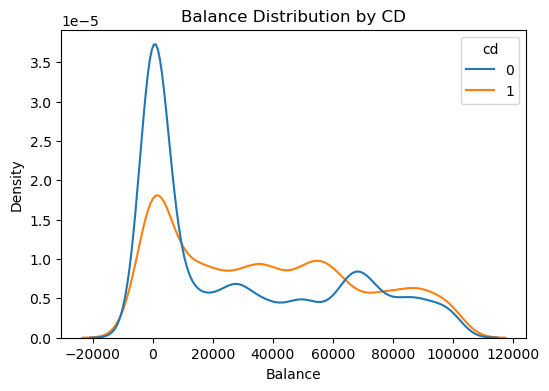

<Figure size 640x480 with 0 Axes>

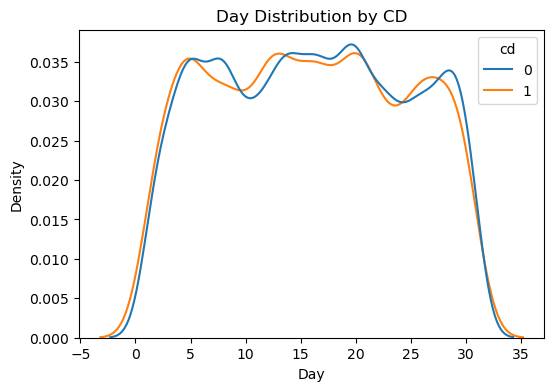

<Figure size 640x480 with 0 Axes>

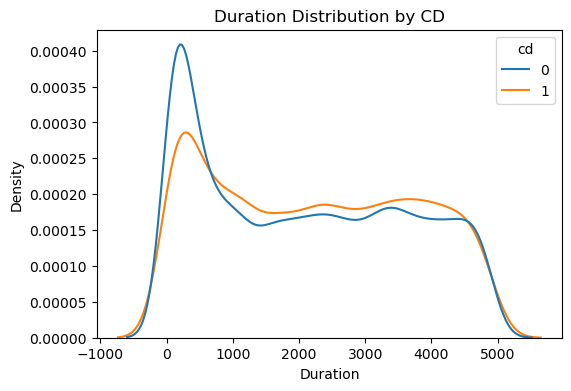

<Figure size 640x480 with 0 Axes>

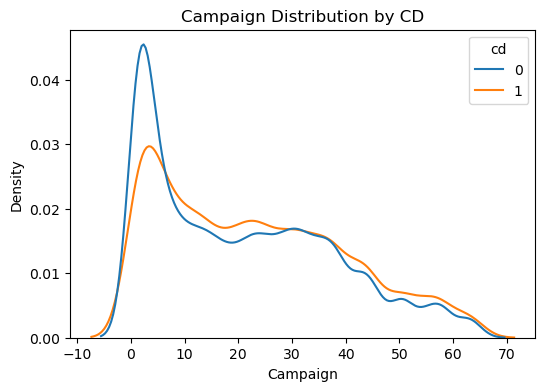

<Figure size 640x480 with 0 Axes>

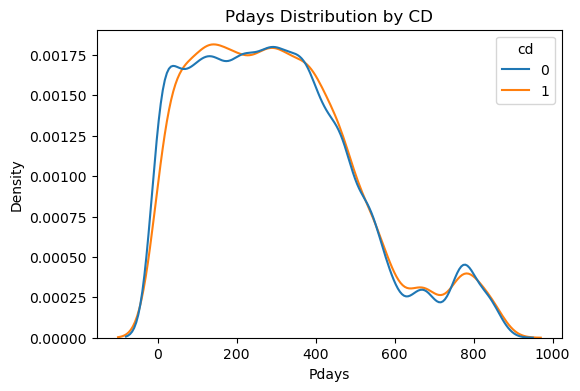

<Figure size 640x480 with 0 Axes>

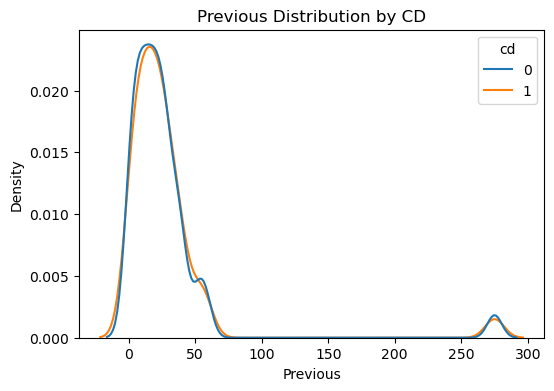

In [48]:
columns_to_plot = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in columns_to_plot:
    plt.figure()
    plt.figure(figsize=(6, 4))  
    sns.kdeplot(data=df, x=col, hue='cd', common_norm=False)
    plt.title(f'{col.capitalize()} Distribution by CD')
    plt.xlabel(col.capitalize())
    plt.ylabel('Density')
    plt.show()

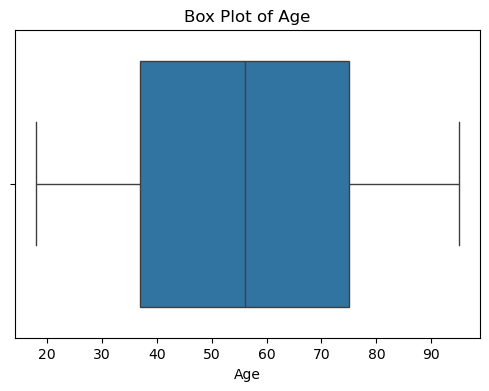

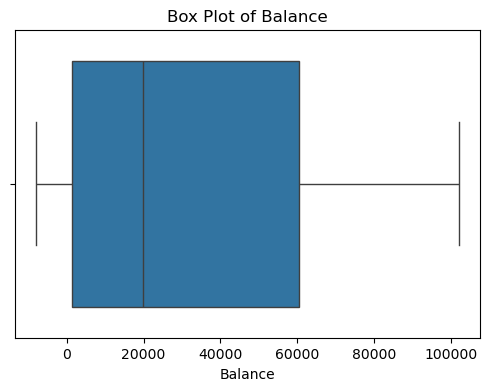

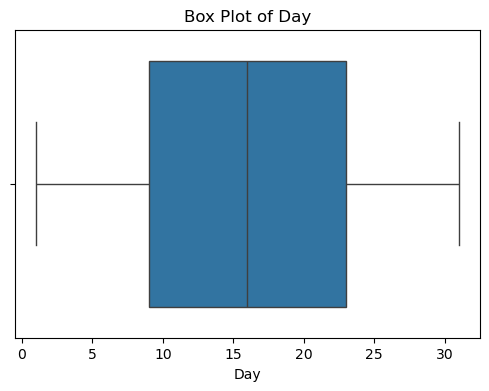

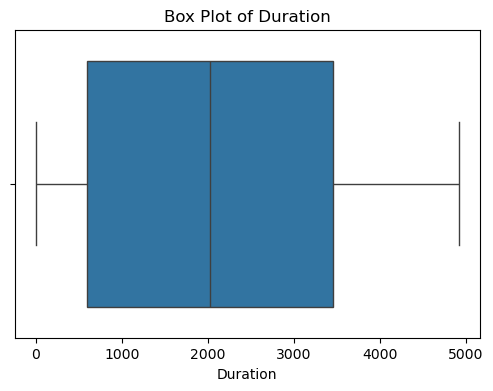

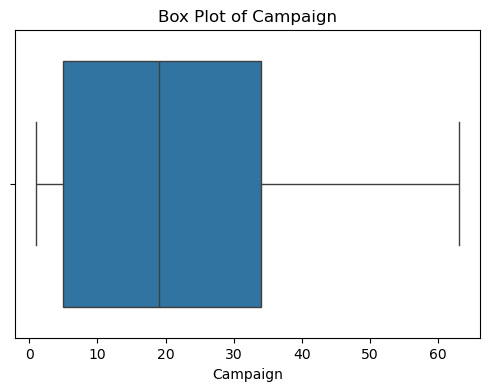

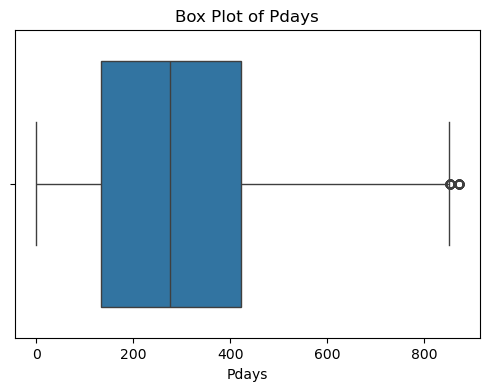

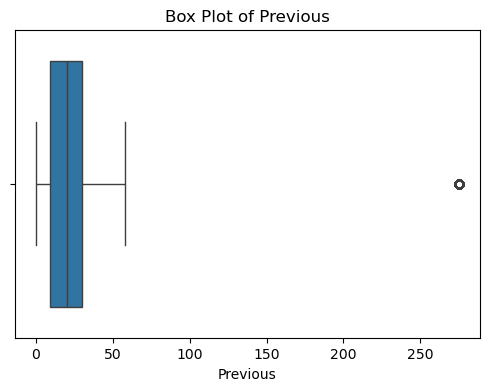

In [49]:
import seaborn as sns

columns_to_plot = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.show()

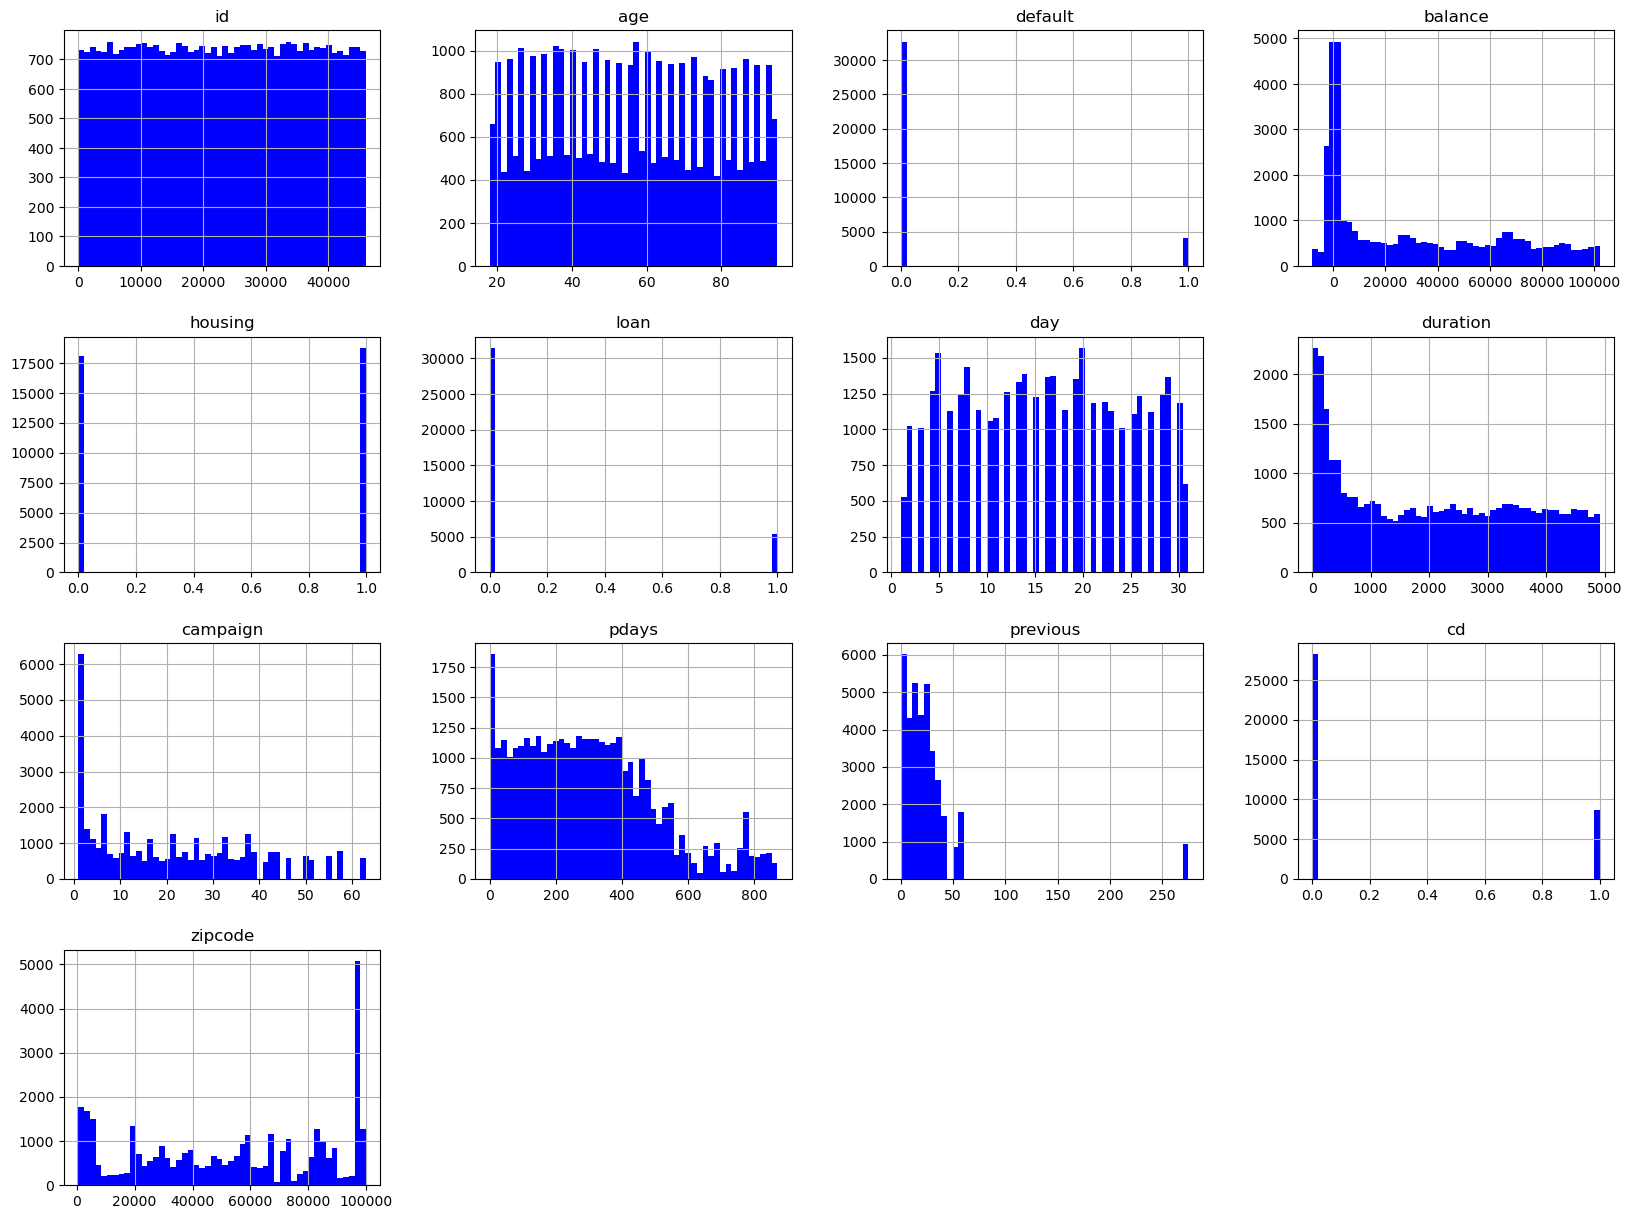

In [50]:
df.hist(bins=50, figsize =(20,15), color = "blue")
plt.show()

Missing Value

In [51]:
cols_to_checkmissing = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

missing_values = df[cols_to_checkmissing].isnull().sum()
print("Missing values in specified columns:")
print(missing_values[missing_values > 0])

Missing values in specified columns:
campaign      9
previous    377
dtype: int64


Skewness of Numerical cols

In [52]:
cols_to_skew = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in cols_to_skew:
    skewness = df[col].skew()
    print('Skew of', col, ':', skewness)

Skew of age : 0.037615811712568704
Skew of balance : 0.6146114411406132
Skew of day : 0.01492580620203945
Skew of duration : 0.19401042113448527
Skew of campaign : 0.5669903887961028
Skew of pdays : 0.6541043846336433
Skew of previous : 4.952639611461686


Outlier detection on skewed and normally distributed data

In [53]:
from scipy.stats import zscore

#Since col is skewed lets apply IQR
cols_for_OD = ['balance','pdays', 'campaign', 'previous']

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the number of outliers
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_values = len(df[col])
    outlier_percentage = (num_outliers / total_values) * 100
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

for col in cols_for_OD:
    detect_outliers_iqr(df, col)

#Since duration is normally distrubuted

cols_to_OD1 = ['duration', 'age', 'day']

def  detect_outlier_zcore(df, col, threshold=3):
    z_scores = zscore(df[col])

    # Calculate the number of outliers
    num_outliers = ((z_scores > threshold) | (z_scores < -threshold)).sum()
    total_values = len(df[col])
    outlier_percentage = (num_outliers / total_values) * 100
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

for col in cols_to_OD1:
    detect_outlier_zcore(df, col)

Percentage of outliers in balance: 0.00%
Percentage of outliers in pdays: 0.36%
Percentage of outliers in campaign: 0.00%
Percentage of outliers in previous: 2.53%
Percentage of outliers in duration: 0.00%
Percentage of outliers in age: 0.00%
Percentage of outliers in day: 0.00%


Bi-Variate Analysis

1. Categorical vs. Categorical

Relationship between categorical columns
1. Job and Marital, Job and Eductaion, Marital and Generation these have very strong association
    1. Applying OHE because on boosting and tree based model wouldnt be affected by multicollinearity
2. poutcome with job, marital, and contact have weak association
    1. non-multicollinearity

In [54]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education']

# Function to perform Chi-Square test between all pairs of specified categorical columns
chi_square_results = []
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform Chi-Square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            # Append results
            chi_square_results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-Square': chi2,
                'p-value': p_value
            })

chi_square_df = pd.DataFrame(chi_square_results)
significant_results = chi_square_df[chi_square_df['p-value'] < 0.05]
print("Significant Chi-Square Test Results")
print(significant_results)

Significant Chi-Square Test Results
      Column 1    Column 2    Chi-Square       p-value
0          job     marital   3205.738263  0.000000e+00
1          job    poutcome     70.746002  1.455071e-04
3          job  generation     94.721222  1.412209e-05
4          job   education  21659.974619  0.000000e+00
5      marital         job   3205.738263  0.000000e+00
6      marital    poutcome     25.450480  2.817135e-04
8      marital  generation   2439.928282  0.000000e+00
9      marital   education    294.178042  1.445724e-60
10    poutcome         job     70.746002  1.455071e-04
11    poutcome     marital     25.450480  2.817135e-04
12    poutcome     contact     27.071815  1.403896e-04
13    poutcome  generation     30.852114  2.074902e-03
17     contact    poutcome     27.071815  1.403896e-04
20  generation         job     94.721222  1.412209e-05
21  generation     marital   2439.928282  0.000000e+00
22  generation    poutcome     30.852114  2.074902e-03
25   education         job  2

Relationship between categorical columns and target column
1. poutcome and contact have strong association with target column
    1. Applying target mean encoding to capture their relationship with the target

In [55]:
categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education']
chi_square_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['cd'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Column': col,
        'Chi-Square': chi2,
        'p-value': p_value
    })


chi_square_df = pd.DataFrame(chi_square_results)
significant_results = chi_square_df[chi_square_df['p-value'] < 0.05]
print("Significant Chi-Square Test Results with Target")
print(significant_results)


Significant Chi-Square Test Results with Target
     Column  Chi-Square       p-value
2  poutcome   11.463713  9.465348e-03
3   contact   42.039441  7.434492e-10


2. Numerical vs. Numerical

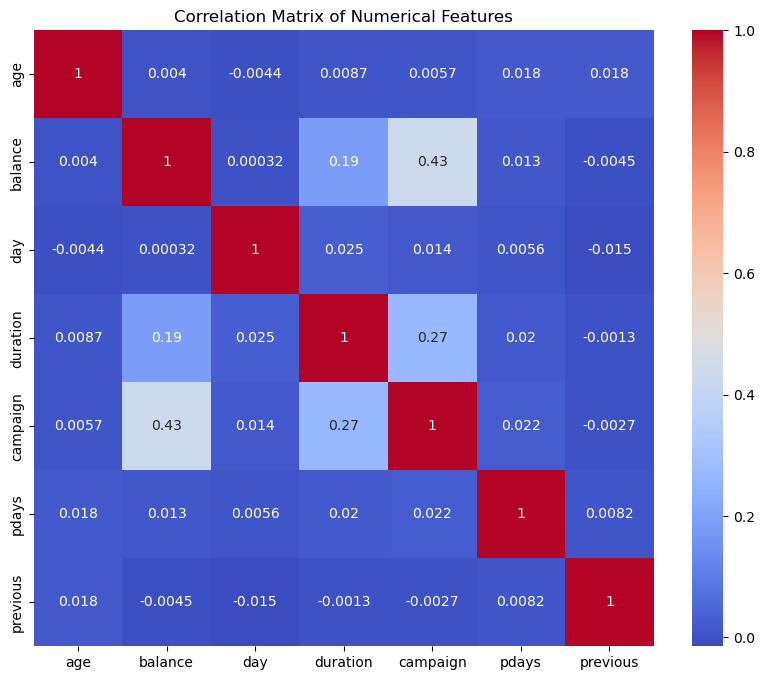

In [56]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Numerical vs binary 


In [57]:
from scipy.stats import ttest_ind
binary_features= ['default', 'housing', 'loan']

for binary in binary_features:
    for numeric in numerical_features:
        group0 = df[df[binary] == 0][numeric]
        group1 = df[df[binary] == 1][numeric]
        t_stat, p_val = ttest_ind(group0, group1)
        print(f"T-test for {numeric} by {binary}: t-statistic = {t_stat}, p-value = {p_val}")

T-test for age by default: t-statistic = -1.1208088632084874, p-value = 0.2623765309757613
T-test for balance by default: t-statistic = -2.5451417125992477, p-value = 0.010927377222404692
T-test for day by default: t-statistic = 0.07982332186714132, p-value = 0.9363782085731069
T-test for duration by default: t-statistic = -3.197989386511759, p-value = 0.0013850623643056911
T-test for campaign by default: t-statistic = nan, p-value = nan
T-test for pdays by default: t-statistic = -2.5675558618501597, p-value = 0.010245733747253535
T-test for previous by default: t-statistic = nan, p-value = nan
T-test for age by housing: t-statistic = -1.0959784791058627, p-value = 0.27309535141011826
T-test for balance by housing: t-statistic = -1.633746347031651, p-value = 0.1023206605785425
T-test for day by housing: t-statistic = -1.9343861349375338, p-value = 0.05307331143989158
T-test for duration by housing: t-statistic = -0.8131831964251154, p-value = 0.4161182832129168
T-test for campaign by h

3. Numerical vs. Categorical

In [58]:
from scipy.stats import f_oneway

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education', 'default', 'housing', 'loan']

for cat_col in categorical_columns:
    for num_col in numerical_cols:
        groups = [df[df[cat_col] == category][num_col] for category in df[cat_col].unique()]
        f_stat, p_value = f_oneway(*groups)

        if p_value < 0.05:
            print(f"ANOVA for {num_col} by {cat_col}: F-statistic = {f_stat}, p-value = {p_value}")


/opt/anaconda3/envs/MlProject/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA for age by poutcome: F-statistic = 5.180748053804119, p-value = 0.0014093206532630855
ANOVA for day by poutcome: F-statistic = 3.9402714832373777, p-value = 0.008029323955286377
ANOVA for pdays by poutcome: F-statistic = 49.74777812794231, p-value = 4.4518578989277243e-32
ANOVA for day by contact: F-statistic = 3.466174161529933, p-value = 0.031246486932618174
ANOVA for pdays by contact: F-statistic = 31.296991713470845, p-value = 2.6267237752118787e-14
ANOVA for balance by default: F-statistic = 6.47774633721262, p-value = 0.010927377222307973
ANOVA for duration by default: F-statistic = 10.2271361162419, p-value = 0.0013850623642965559
ANOVA for pdays by default: F-statistic = 6.592343103721165, p-value = 0.010245733747164906
ANOVA for pdays by housing: F-statistic = 4.025974200198899, p-value = 0.044812024909430856
ANOVA for day by loan: F-statistic = 4.582414988769966, p-value = 0.03230819899847629
ANOVA for duration by loan: F-statistic = 4.247027447285811, p-value = 0.03932

Model Building

Dropping unwanted columns

In [59]:
df.drop(columns= ['id', 'Unnamed: 21', 'Unnamed: 22','state', 'zipcode'], inplace= True)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [61]:
#Impute missing values
for col in ['job', 'marital', 'generation']:
    df[col] = df[col].fillna(df[col].mode()[0])

df['previous'] = df['previous'].fillna(df['previous'].median())
df['campaign'] = df['campaign'].fillna(df['campaign'].mean())

# Handle outliers in 'previous' by removing extreme values 
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['previous'] < (Q1 - 1.5 * IQR)) | (df['previous'] > (Q3 + 1.5 * IQR)))]

# Binning 'age' and One-Hot Encoding the bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])
df = pd.get_dummies(df, columns=['age_bin'], drop_first=True)

# Frequency Mean Encoding for 'poutcome' and 'contact'
for col in ['poutcome', 'contact']:
    freq_mean = df.groupby(col)['cd'].mean()  # 'cd' is the target column
    df[col] = df[col].map(freq_mean)

# One-Hot Encoding for other categorical columns
one_hot_cols = ['job', 'marital', 'education', 'generation', 'month']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_364/2813968125.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])


In [62]:
X = df.drop(['cd'], axis=1) 
y = df['cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'age_bin_Medium', 'age_bin_High', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_Secondary', 'education_Tertiary', 'education_Unknown',
       'generation_millenials', 'generation_older boomers',
       'generation_silent generation', 'generation_younger boomers',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [64]:
X_train.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
30587,48,0,-1401,1,0,0.232184,19,3918,1.0,403,...,False,False,False,False,False,False,False,True,False,False
6112,65,0,66266,0,0,0.232184,18,2207,26.0,164,...,False,False,False,False,False,False,False,True,False,False
34098,53,0,23301,0,1,0.253194,19,2121,39.0,334,...,False,False,False,False,False,False,True,False,False,False
5012,31,0,-2924,1,0,0.217754,28,4433,46.0,366,...,False,False,False,False,False,False,False,False,False,False
32153,40,0,32336,1,0,0.217754,20,4393,50.0,460,...,False,False,False,False,False,True,False,False,False,False


In [65]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [68]:
from sklearn.metrics import classification_report

y_pred = xgb_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5476
           1       0.78      0.61      0.68      1712

    accuracy                           0.86      7188
   macro avg       0.83      0.78      0.80      7188
weighted avg       0.86      0.86      0.86      7188



Accuracy Score

In [ ]:
y_pred = xgb_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

ROC-AUC Score

In [ ]:
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]


train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f'Train ROC AUC: {train_auc}')
print(f'Test ROC AUC: {test_auc}')

Train ROC AUC: 0.9799139009288764
Test ROC AUC: 0.9064737887672971


Using RandomSearchCV finding best hyperparameter of XGBOOST

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3],
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='roc_auc', 
    cv=3,  
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train, y_train) 

print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best ROC AUC Score: 0.9013446738212508


5-Fold Cross-Validation

In [ ]:
xgb_model = XGBClassifier(
    subsample=1.0, 
    reg_lambda=2, 
    reg_alpha=0, 
    n_estimators=400, 
    max_depth=10, 
    learning_rate=0.1, 
    gamma=0, 
    colsample_bytree=0.8, 
    eval_metric='logloss',
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='roc_auc')

print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of ROC AUC Scores: {np.std(cv_scores):.4f}")


Cross-Validation ROC AUC Scores: [0.9005942  0.90814393 0.90117437 0.91596557 0.90791174]
Mean ROC AUC Score: 0.9068
Standard Deviation of ROC AUC Scores: 0.0056


In [ ]:
"""numerical_features = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
age_feature = ['age']
categorical_features = ['job', 'marital', 'education', 'generation']
binary_features = ['default', 'housing', 'loan']
target_encoding_features = ['poutcome', 'contact']
def safe_log_transform(x):
    x = np.clip(x, a_min=1e-9, a_max=None)
    return np.log1p(x)  

# Preprocessing for numerical features excluding 'age'
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute first to handle NaN
    ('log_transform', FunctionTransformer(safe_log_transform, validate=False)),
    ('scaler', StandardScaler())
])

# Preprocessing for 'age' with binning
age_binner = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('age_binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))
])

# Preprocessing for categorical features with One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Preprocessing for target-encoded features
target_encoder_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('target_mean_encoding', TargetEncoder())
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('age', age_binner, age_feature),
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('target_encoded', target_encoder_transformer, target_encoding_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'  
)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('classifier', xgb.XGBClassifier(scale_pos_weight=2.0))
])"""

"numerical_features = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']\nage_feature = ['age']\ncategorical_features = ['job', 'marital', 'education', 'generation']\nbinary_features = ['default', 'housing', 'loan']\ntarget_encoding_features = ['poutcome', 'contact']\ndef safe_log_transform(x):\n    x = np.clip(x, a_min=1e-9, a_max=None)\n    return np.log1p(x)  \n\n# Preprocessing for numerical features excluding 'age'\nnumerical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),  # Impute first to handle NaN\n    ('log_transform', FunctionTransformer(safe_log_transform, validate=False)),\n    ('scaler', StandardScaler())\n])\n\n# Preprocessing for 'age' with binning\nage_binner = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),\n    ('age_binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))\n])\n\n# Preprocessing for categorical features with One-Hot Encoding\ncategorical_transformer = Pipeline(st